## Training area for agents in Maze Runner

In [1]:
# Imports
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import matplotlib.pyplot as plt
import maze_generator.maze_dataset as md
import numpy as np
from DQN.training.basic import BaseTraining
from DQN.agents.runner_agent import MazeRunnerAgent

import DQN.models.base as base
print(os.getcwd())

/home/cody/Documents/DataSciBC/Generative_AI/maze_game/TrainingGround


### Define the Mazes

In [2]:
dataset = md.Maze_dataset(1,(3,3),maze_type = 'percolation')

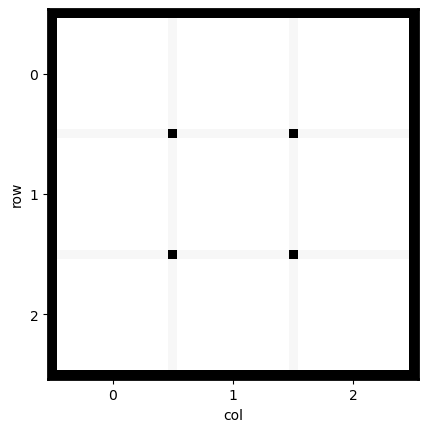

In [3]:
# example of the maze
dataset.show_maze(0)

In [4]:
# parameters for the agents
n_agents = 2
vision = 3

In [5]:
%matplotlib notebook


# --- Agents for the Hunger Games --- #
maze_agent =MazeRunnerAgent({'agents':base.CNN_version1},
                               vision={'agents':vision},
                               action_type='cardinal',
                               dist_paradigm='path'
                               )

# --- trainer of the agent --- #
train = BaseTraining(name = 'TestRunner',
                              maze_dataset = dataset,
                              maze_agent = maze_agent,
                              len_game=30,
                              n_objects={'agents':n_agents},
                              final_epsilon = 0.05,
                              gamma = 0.99,
                              tau = 0.0001,
                               batch_size = 64,
                              n_frames = 500000,
                              lr = 0.0005,
                              lr_heads=0.0005,
                              lr_step_size=5000,
                              lr_head_step_size=2500,
                              lr_gamma = 0.98,
                              lr_head_gamma = 0.98,
                              l2_regular=0.01,
                              replay_buffer_size=200000,
                              replay_buffer_min_perc=0.1,
                              target_update=5000,
                              policy_update=1,
                              lambda_entropy=0.1,
                              beta = 0.4,
                              alpha = 0.6,
                              decay_total = 200000,
                              per = True,
                              frame_mult=1.5,
                              )
train.train(test_agent=True,peak=False)

{'agents': <Maze_env.reward_functions.maze_runner.MazeRunnerRewardsFun object at 0x7daa3c2d3d10>}
----------------------------------
Basic epsilon decay scheduler:
Start epsilon: 1
End epsilon: 0.05
Decay total: 200000
Decay rate: 0.0014903642610661133

------------------------------
Group 0: Learning rate = 0.0005
--------------------------------------
Basis learning rate scheduler:
Step size: 5000
Gamma: 0.98


/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'dict'>
  logger.warn(


----------------------------------

frame [10000:320000] with loss 19.486249923706055
Learning rate : 0.0005
Epsilon: 0.9999850214508118
Current Score: {'agents': 0.12500000000000008}
cumulative reward: {'agents': [-309.98333333333335, -259.7055555555555]}
cumulative reward: {'agents': [-212.5, -209.2425925925926]}
cumulative reward: {'agents': [-183.47592592592594, -119.40185185185186]}
cumulative reward: {'agents': [-262.5, 67.79444444444447]}
cumulative reward: {'agents': [-183.47592592592594, -212.5]}
cumulative reward: {'agents': [-83.14629629629628, -86.1648148148148]}
cumulative reward: {'agents': [68.80555555555557, -144.17037037037036]}
cumulative reward: {'agents': [-259.7055555555555, 75.85555555555557]}
cumulative reward: {'agents': [-262.5, -162.5]}
cumulative reward: {'agents': [-162.5, -209.2425925925926]}
----------------------------------

frame [20000:320000] with loss 7.122337341308594
Learning rate : 0.00048019999999999996
Epsilon: 0.8608787644236698
Current Score: 

KeyboardInterrupt: 

In [15]:
train.save()
train.results()

/home/cody/Documents/DataSciBC/Generative_AI/maze_game/DQN/training/basic.py:631: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = scores_df, x ='frame',y = 'score',ax = axe[1][1],palette='tab10')


TypeError: unhashable type: 'list'

In [7]:
train.agents.test_agent(dataset,n_episodes=1000,len_game=15,num_objects={'agents':n_agents})

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'dict'>
  logger.warn(


{'agents': 0.0}

In [ ]:

train.agents.run_agent(dataset[0],num_objects={'agents':n_agents},n_episodes=20,len_game=15,epsilon=0,init_pos={})


/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'dict'>
  logger.warn(


cumulative reward: {'agents': [22.58703703703704]}
cumulative reward: {'agents': [11.961111111111112]}
cumulative reward: {'agents': [-120.24074074074073]}
cumulative reward: {'agents': [14.811111111111112]}
cumulative reward: {'agents': [-195.83333333333331]}
cumulative reward: {'agents': [12.033333333333335]}
cumulative reward: {'agents': [-176.64999999999998]}
cumulative reward: {'agents': [22.65925925925926]}
cumulative reward: {'agents': [17.57777777777778]}
cumulative reward: {'agents': [-195.83333333333331]}
cumulative reward: {'agents': [-176.64999999999998]}
cumulative reward: {'agents': [-176.64999999999998]}
cumulative reward: {'agents': [-105.99999999999999]}
cumulative reward: {'agents': [22.65925925925926]}
cumulative reward: {'agents': [25.425925925925927]}
cumulative reward: {'agents': [25.425925925925927]}
cumulative reward: {'agents': [-146.27777777777777]}
cumulative reward: {'agents': [6.362962962962964]}
cumulative reward: {'agents': [22.65925925925926]}
cumulative